<img src="https://github.com/djp840/MSDS_422_Public/blob/master/images/NorthwesternHeader.png?raw=1">

## MSDS422 Assignment 04:

<div class="alert alert-block alert-success">
    <b>More Technical</b>: Throughout the notebook. This types of boxes provide more technical details and extra references about what you are seeing. They contain helpful tips, but you can safely skip them the first time you run through the code.
</div>

### Data Dictionary Housing Values in Suburbs of Boston

The Boston data frame has 506 rows and 14 columns.<br>
The <b>medv variable</b> is the target variable.<br>
<br>
<b>crim</b><br>
per capita crime rate by town.<br>
<br>
<b>zn</b><br>
proportion of residential land zoned for lots over 25,000 sq.ft.<br>
<br>
<b>inducrims</b><br>
proportion of non-retail business acres per town.<br>
<br>
<b>chas</b><br>
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).<br>
<br>
<b>nox</b><br>
nitrogen oxides concentration (parts per 10 million).<br>
<br>
<b>rm</b><br>
average number of rooms per dwelling.<br>
<br>
<b>age</b><br>
proportion of owner-occupied units built prior to 1940.<br>
<br>
<b>dis</b><br>
weighted mean of distances to five Boston employment centres.<br>
<br>
<b>rad</b><br>
index of accessibility to radial highways.<br>
<br>
<b>tax</b><br>
full-value property minus tax rate per ten thousand dollars<br>
<br>
<b>ptratio</b><br>
pupil-teacher ratio by town.<br>
<br>
<b>black</b><br>
1 Thousand(Bk - 0.63)^2" where Bk is the proportion of blacks by town.<br>
<br>
<b>lstat</b><br>
lower status of the population (percent).<br>
<br>
<b>medv</b><br>
median value of owner-occupied homes in $1000s.<br>
<br>
<br>
<b>Sources:</b><br>
Harrison, D. and Rubinfeld, D.L. 1978 Hedonic prices and the demand for clean air. J. Environ. Economics and Management 5, 81–102.<br>
<br>
Belsley D.A., Kuh, E. and Welsch, R.E. 1980 Regression Diagnostics. Identifying Influential Data and Sources of Collinearity. New York: Wiley.<br>

## Import packages 

In [207]:
import numpy as np
import pandas as pd
import os
import itertools
from math import sqrt
from scipy import stats as st
#import cvxopt

import sklearn 
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.model_selection import train_test_split

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import statsmodels.api as sm

from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [208]:
%matplotlib inline

In [209]:
np.set_printoptions(precision=4)

<div class="alert alert-block alert-info">
    <b>Suppress warning messages</b></div>

In [210]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

### Mount Google Drive to Colab Enviorment

In [211]:
#from google.colab import drive
#drive.mount('/content/gdrive')

### Load Data (Local Directory)

In [212]:
boston_df=pd.read_csv('boston.csv')

### Data Quality Review 

In [213]:
print("Shape:", boston_df.shape,"\n")
print("Variable Types:") 
print(boston_df.dtypes)

Shape: (506, 14) 

Variable Types:
neighborhood     object
crim            float64
zn              float64
indus           float64
chas              int64
nox             float64
rooms           float64
age             float64
dis             float64
rad               int64
tax               int64
ptratio         float64
lstat           float64
mv              float64
dtype: object


In [214]:
boston_df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


 <div class="alert alert-block alert-warning">
Dropping Neighborhood as it is non-numeric
 </div>

In [215]:
boston_df=boston_df.drop('neighborhood', 1)

## Exploritory Data Analysis (EDA) 

### Review Dataset for Missing Values

In [216]:
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

<div class="alert alert-block alert-warning">
Attention to the <b>count</b> row for each column number of records
</div> 

In [217]:
boston_df.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [218]:
boston_df['zn'].value_counts()

0.0      372
20.0      21
80.0      15
12.5      10
22.0      10
25.0      10
40.0       7
45.0       6
30.0       6
90.0       5
21.0       4
95.0       4
60.0       4
33.0       4
75.0       3
35.0       3
28.0       3
55.0       3
52.5       3
70.0       3
34.0       3
85.0       2
82.5       2
17.5       1
100.0      1
18.0       1
Name: zn, dtype: int64

### Review Dataset Distributions  Boxplot and Histograms

boston_df.boxplot(vert=False, figsize=(10,10), grid=False)

sns.pairplot(boston_df, diag_kind='hist')

## Preprocess Data for Analysis

#### Normalizing Variable Distributions with Log Transformation 

Analysis of linear relationships between variables can introduce "0" (zero) values, these have to be removed to be able to work with Log transformation (normalization) of the data

<div class="alert alert-block alert-info">
https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.boxcox.html
    </div>

y = (x**lmbda - 1) / lmbda,  for lmbda > 0<br>
    log(x),                  for lmbda = 0<br>

<b>boxcox</b> requires the input data to be positive. Sometimes a Box-Cox transformation provides a `shift parameter` to achieve this;<br> <b>boxcox</b> does not. Such a shift parameter is equivalent to adding a positive constant to x before calling boxcox.

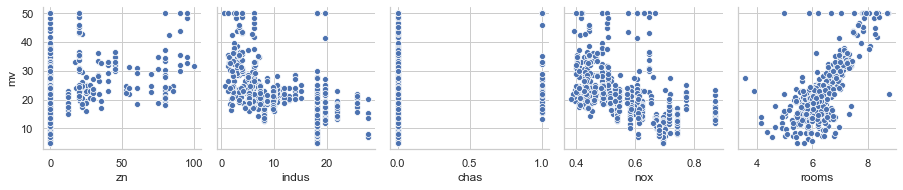

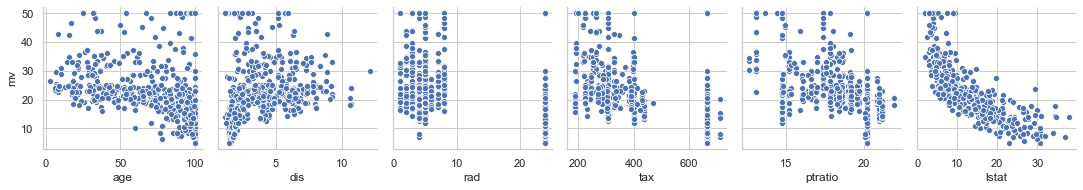

In [219]:
sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[1:6])
sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[6:-1])

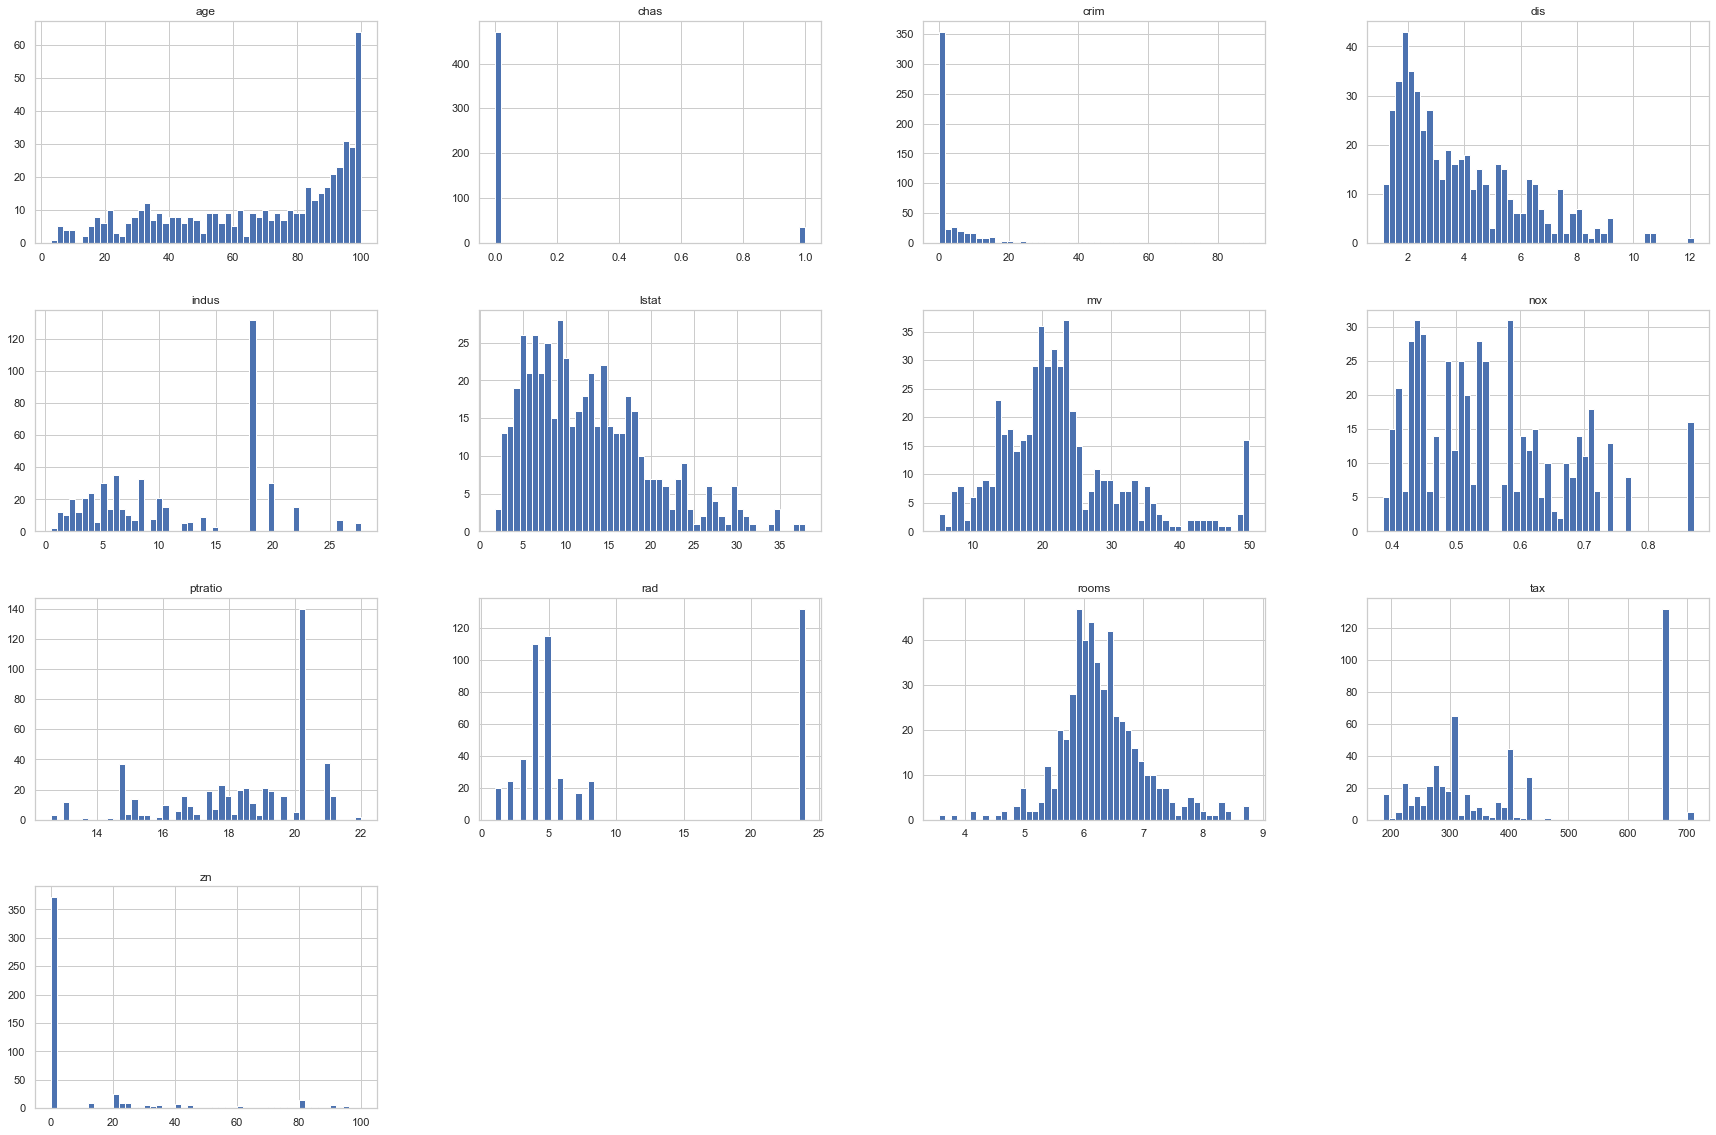

In [220]:
boston_df.hist( bins = 50, figsize = (30, 20)); plt.show()

In [221]:
#boston_df['mv']= np.log(boston_df['mv'])

sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[1:6])
sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[6:-1])

boston_df.hist( bins = 50, figsize = (30, 20)); plt.show()

In [222]:
boston_df['crim']= np.log(boston_df['crim'])

In [223]:
boston_df['zn']= (boston_df['zn']+0.5)**(0.5)

In [224]:
boston_df['indus']= (boston_df['indus'])**2

In [225]:
boston_df['nox']= np.log((boston_df['nox']))

In [226]:
boston_df['rooms']= (boston_df['rooms'])**(1/3)

In [227]:
boston_df['age']= (boston_df['age'])**2

In [228]:
boston_df['dis']= np.log(boston_df['dis'])

In [229]:
boston_df['rad']= np.log(boston_df['rad'])#**(0.5)

In [230]:
boston_df['tax']= np.log(boston_df['tax'])

In [231]:
boston_df['ptratio']= np.log(boston_df['ptratio'])

In [232]:
boston_df['lstat']= np.log(boston_df['lstat'])

boston_df['crim']= np.log(boston_df['crim'])

boston_df['zn']= (boston_df['zn']+0.5)**(0.5)

boston_df['indus']= (boston_df['indus'])**2

boston_df['nox']= np.log((boston_df['nox']))

boston_df['rooms']= (boston_df['rooms'])**(1/3)

boston_df['age']= (boston_df['age'])**2

boston_df['dis']= np.log(boston_df['dis'])

boston_df['rad']= np.log(boston_df['rad'])#**(0.5)

boston_df['tax']= np.log(boston_df['tax'])

boston_df['ptratio']= np.log(boston_df['ptratio'])

boston_df['lstat']= np.log(boston_df['lstat'])

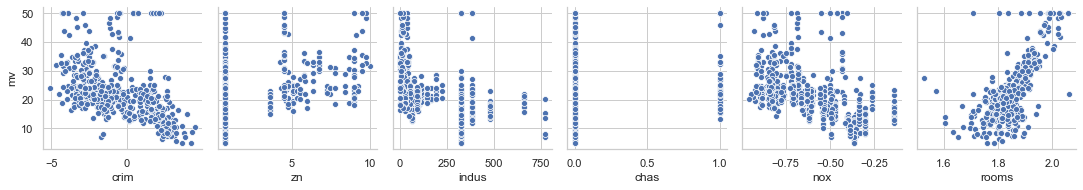

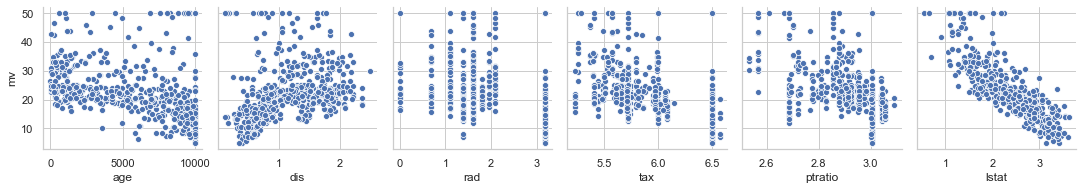

In [233]:
sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[0:6])
sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[6:-1])

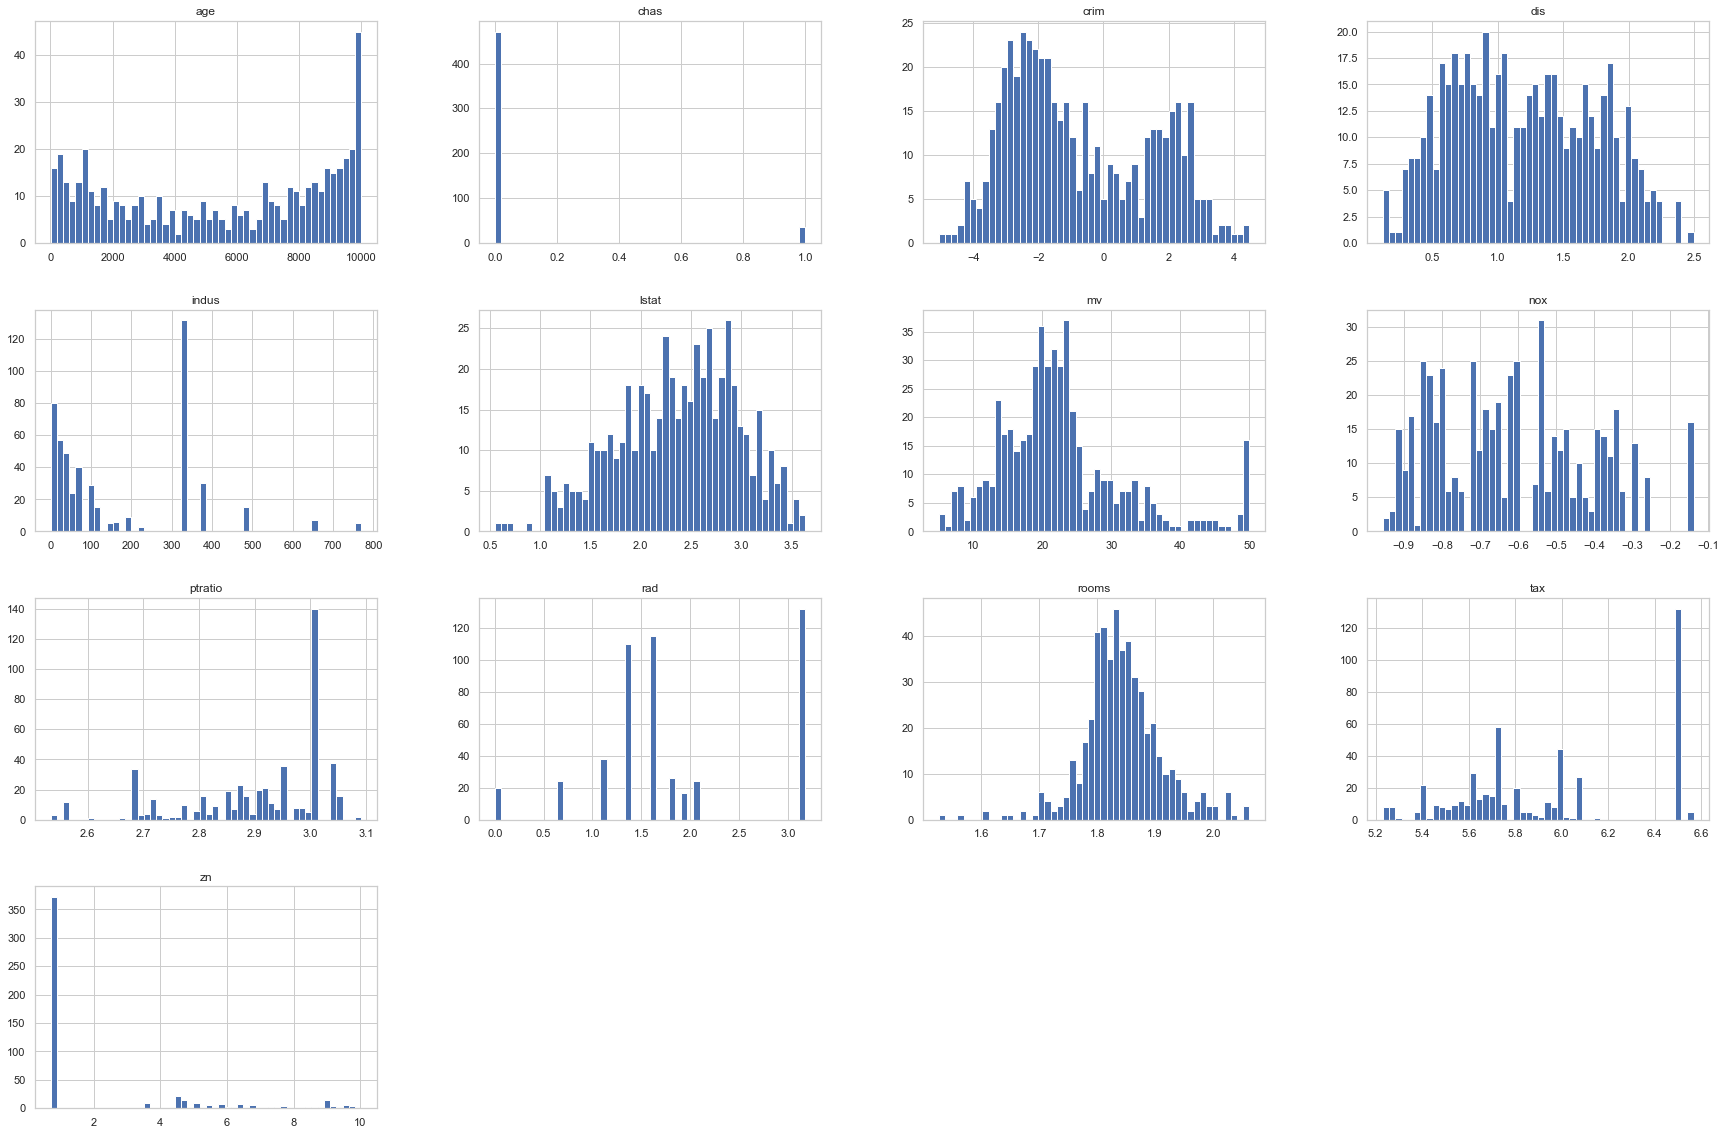

In [234]:
boston_df.hist( bins = 50, figsize = (30, 20)); plt.show()

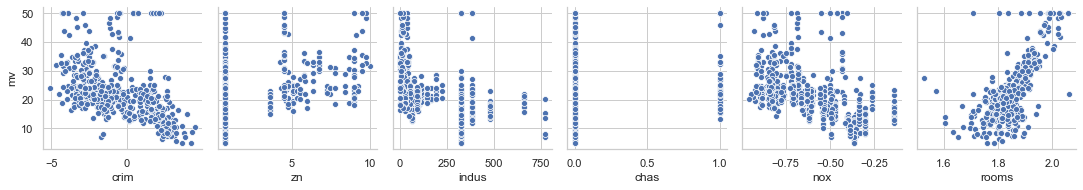

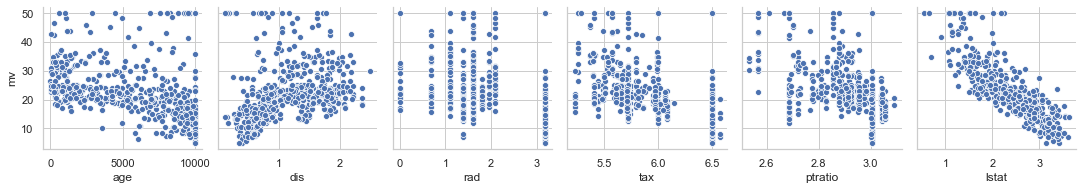

In [235]:
sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[0:6])
sns.pairplot(data=boston_df, y_vars='mv',x_vars=boston_df.columns[6:-1])

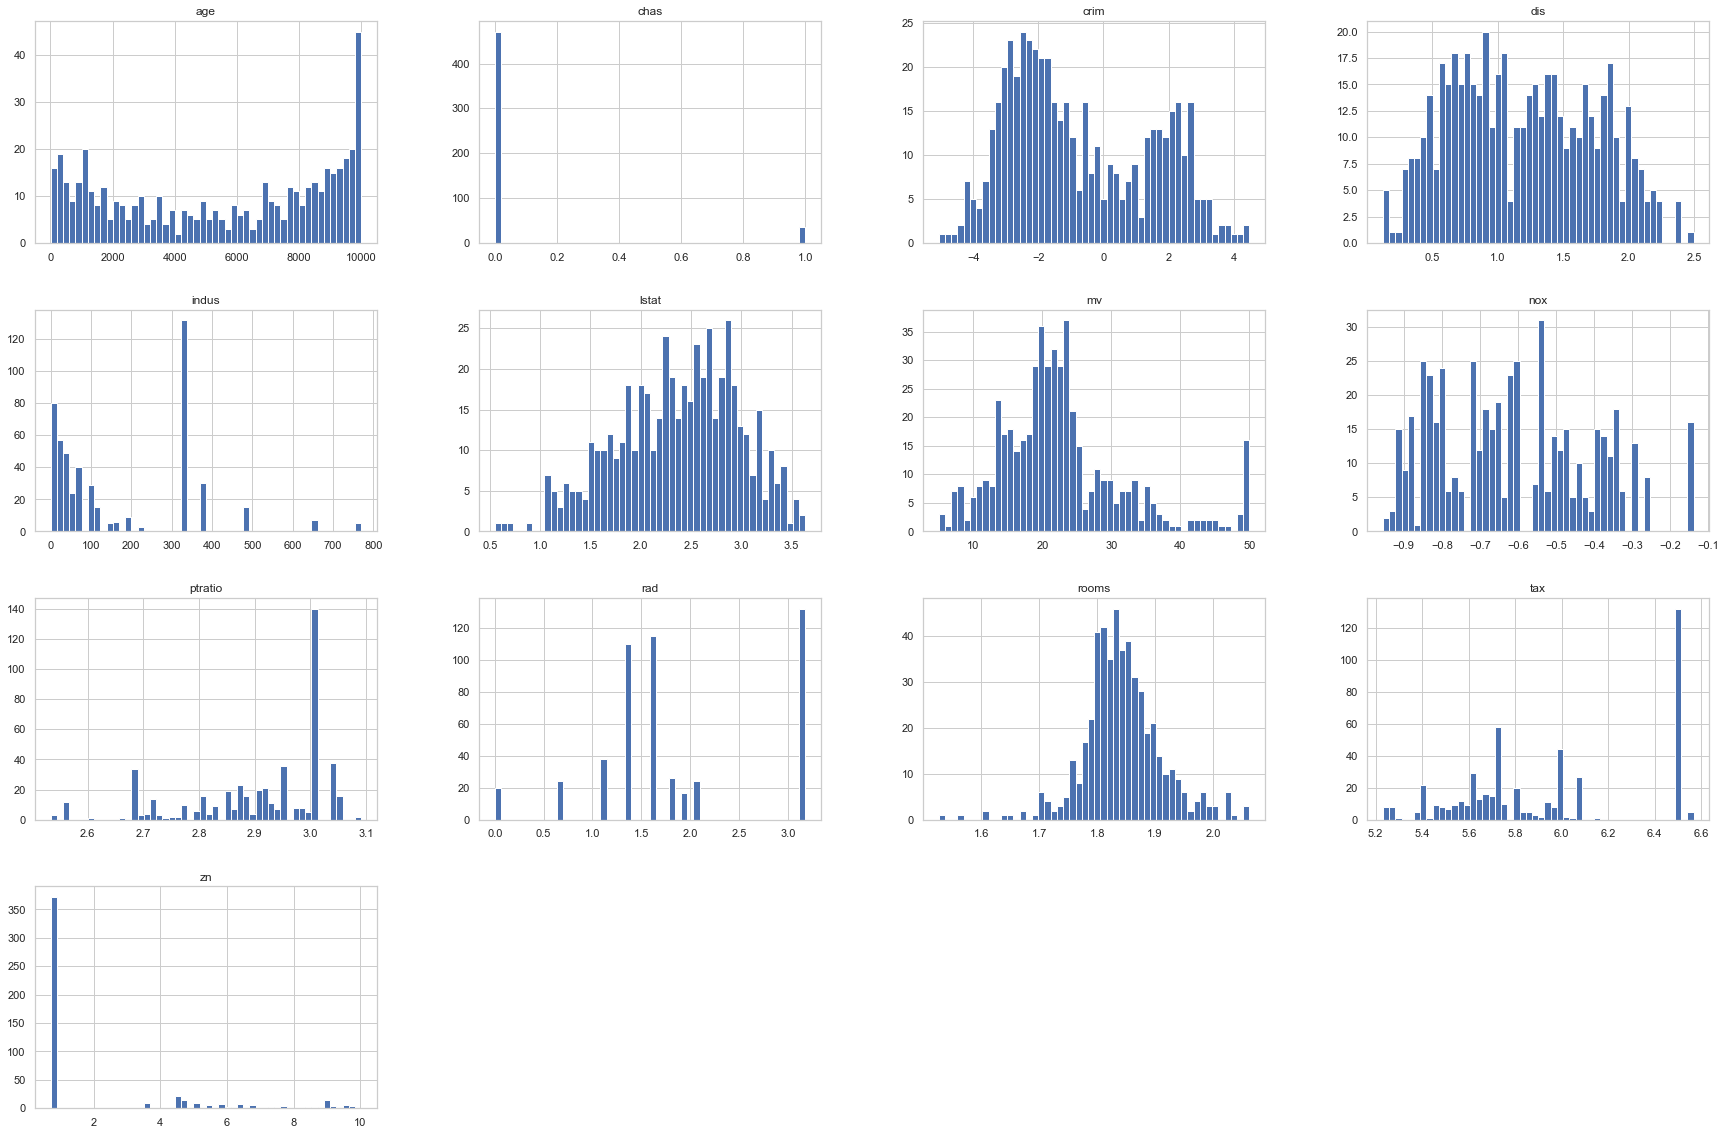

In [236]:
boston_df.hist( bins = 50, figsize = (30, 20)); plt.show()

In [237]:
boston_df.head(1)

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,-5.064036,4.301163,5.3361,0,-0.619897,1.873406,4251.04,1.408545,0.0,5.690359,2.727853,1.60543,24.0


#### Create Dataframe with Target Variable

In [238]:
boston_df1=boston_df.copy()

In [239]:
columns = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
boston_Target = boston_df1.drop(columns=columns)

In [240]:
print(boston_Target.head())

     mv
0  24.0
1  21.6
2  34.7
3  33.4
4  36.2


In [241]:
boston_Target_log =np.log(boston_Target)

In [242]:
boston_Target_log.head()

,mv
0,3.178054
1,3.072693
2,3.546740
3,3.508556
4,3.589059


boston_df2=boston_df.apply(lambda x: x+.01)
boston_df2=boston_df2.transform(lambda x: st.boxcox(x)[0])

sns.pairplot(boston_df2, diag_kind='hist')

boston_df3=boston_df2.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

boston_df3.hist(figsize=(10,10))

#### Plot the distribution of the target variable mv (median value of owner-occupied homes in $1000s)

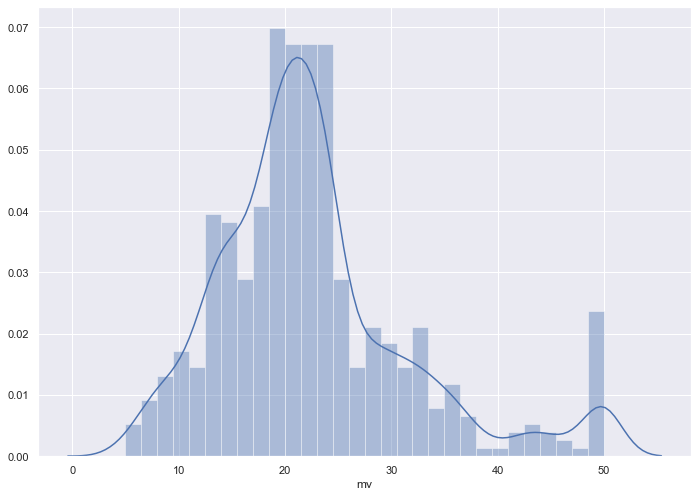

In [243]:
# mv hist
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_Target['mv'], bins=30)
plt.show()

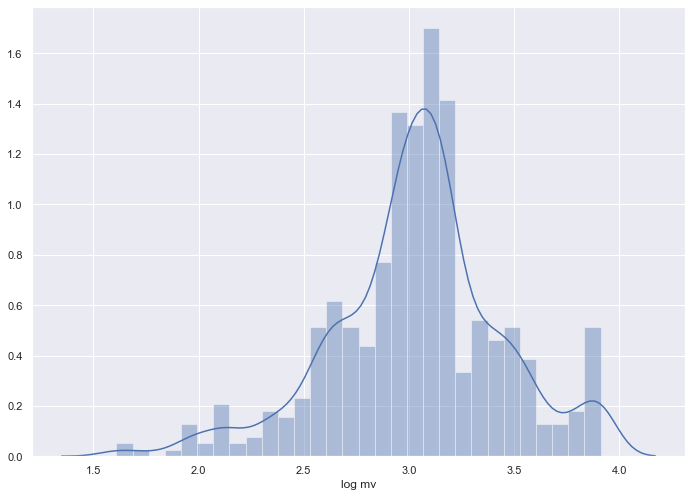

In [244]:
#mv log hist
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_Target_log['mv'], bins=30)
plt.xlabel('log mv')
plt.show()

In [245]:
boston_df1.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rooms      float64
age        float64
dis        float64
rad        float64
tax        float64
ptratio    float64
lstat      float64
mv         float64
dtype: object

The <b>medv variable</b> is the target variable.<br>

In [246]:
cols = boston_df1.columns.tolist()
cols = cols[-1:] + cols[:-1]
boston_df4=boston_df1[cols]
boston_df4.describe(include="all")

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,22.528854,-0.780436,2.186875,170.999269,0.069170,-0.610026,1.842860,5493.309545,1.188032,1.867661,5.931405,2.907914,2.370965
std,9.182176,2.162050,2.663689,171.087497,0.253994,0.201483,0.068717,3449.600164,0.539547,0.874833,0.396367,0.124821,0.600891
min,5.000000,-5.064036,0.707107,0.211600,0.000000,-0.954512,1.527064,8.410000,0.121864,0.000000,5.231109,2.533697,0.548121
25%,17.025000,-2.500488,0.707107,26.936100,0.000000,-0.800732,1.805487,2027.252500,0.742021,1.386294,5.631212,2.856470,1.938729
50%,21.200000,-1.360641,0.707107,93.896100,0.000000,-0.619897,1.837930,6006.290000,1.165473,1.609438,5.799093,2.947064,2.430097
75%,25.000000,1.302119,3.605551,327.610000,0.000000,-0.471605,1.878001,8850.107500,1.646399,3.178054,6.501290,3.005683,2.830563
max,50.000000,4.488369,10.024969,769.507600,1.000000,-0.138113,2.062995,10000.000000,2.495393,3.178054,6.566672,3.091042,3.636796


<div class="alert alert-block alert-info">
    <b>Correlation matrix that measures the linear relationships</b><br> 
    https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html
    </div>

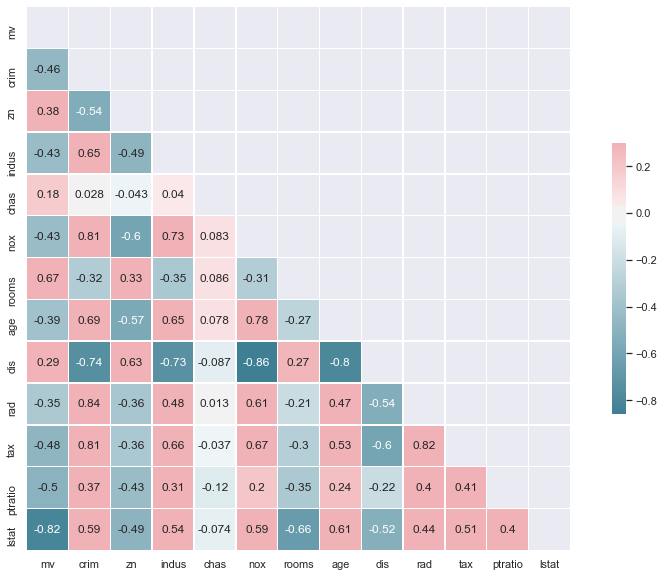

In [247]:
plt.figure(figsize=(15,10))
corr=boston_df4.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

#### Create Dataset for Random Search

In [248]:
boston_df6=boston_df4.copy()

#### Drop Correlated Values ( correlation >= (+/-) 0.75 )

In [249]:
#columns = ['rad', 'nox','dis']
boston_df5 = boston_df4 #.drop(columns=columns)

In [250]:
list(boston_df5.columns.values)

['mv',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat']

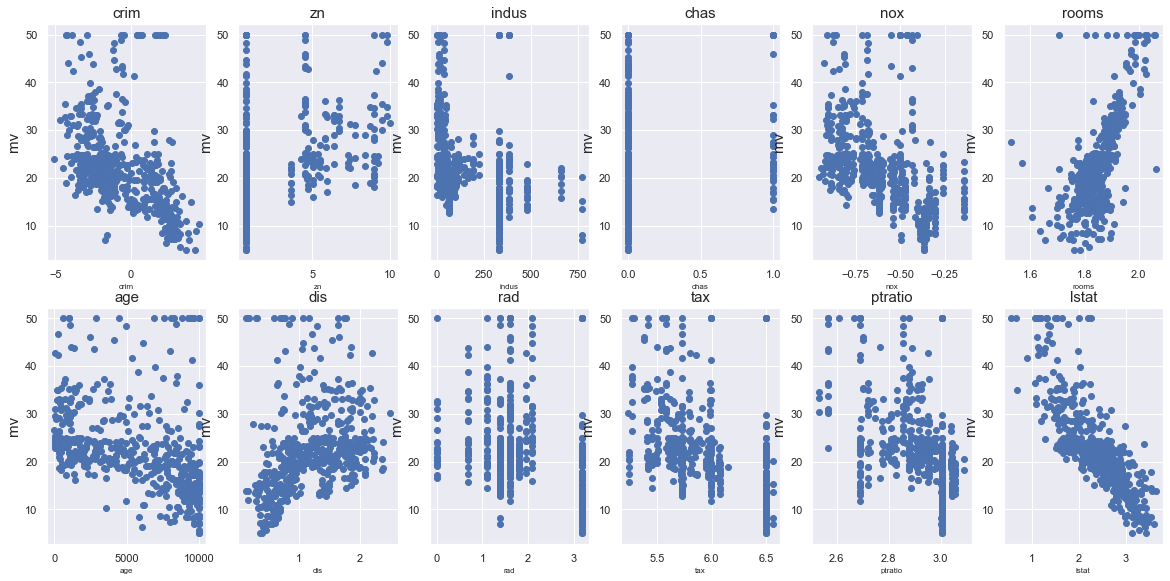

In [251]:
# Create multiple plots
features = boston_df5.drop('mv', 1).columns
target = boston_df5['mv']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(boston_df5[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('mv', fontsize=15)

The variables room and lstat look to have linear relationship with mv target variable

## Create Linear Regression Model

### Summary Statistics for Linear Regression Model - Statsmodel 

['mv',
 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat']

In [252]:
X = pd.DataFrame(np.c_[boston_df['crim']
,boston_df['zn']
,boston_df['indus']
,boston_df['chas']
,boston_df['nox']
,boston_df['rooms']
,boston_df['age']
,boston_df['dis']
,boston_df['rad']
,boston_df['tax']
,boston_df['ptratio']
,boston_df['lstat']])

In [253]:
Y = boston_Target['mv']

In [254]:
X=sm.add_constant(X)
model=sm.OLS(Y, X)

In [255]:
results=model.fit()

In [256]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     153.3
Date:                Sun, 11 Oct 2020   Prob (F-statistic):          1.06e-157
Time:                        17:41:14   Log-Likelihood:                -1446.2
No. Observations:                 506   AIC:                             2918.
Df Residuals:                     493   BIC:                             2973.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         66.5153     11.094      5.995      0.0

In [257]:
# fit log y

In [258]:
X = pd.DataFrame(np.c_[boston_df['crim']
,boston_df['zn']
,boston_df['indus']
,boston_df['chas']
,boston_df['nox']
,boston_df['rooms']
,boston_df['age']
,boston_df['dis']
,boston_df['rad']
,boston_df['tax']
,boston_df['ptratio']
,boston_df['lstat']])

In [259]:
Y = boston_Target_log['mv']

In [260]:
X=sm.add_constant(X)
model=sm.OLS(Y, X)

In [261]:
results=model.fit()

In [262]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                     mv   R-squared:                       0.766
Model:                            OLS   Adj. R-squared:                  0.761
Method:                 Least Squares   F-statistic:                     134.7
Date:                Sun, 11 Oct 2020   Prob (F-statistic):          4.87e-147
Time:                        17:41:16   Log-Likelihood:                 103.63
No. Observations:                 506   AIC:                            -181.3
Df Residuals:                     493   BIC:                            -126.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.5426      0.519     10.687      0.0

<div class="alert alert-block alert-info">
<b>sklearn.linear_model.LinearRegression</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
</div>

In [263]:
X = boston_df5[[ 'crim',
 'zn',
 'indus',
 'chas',
 'nox',
 'rooms',
 'age',
 'dis',
 'rad',
 'tax',
 'ptratio',
 'lstat']]
y = boston_Target_log.mv

In [264]:
yl = boston_Target_log.mv

#### Split Dataset into Training and Test

In [265]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 10)

In [266]:
X_trainl, X_testl, y_trainl, y_testl = train_test_split(X, yl, test_size = 0.30, random_state = 10)

#### Review Train and Testing 

In [267]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape) 

(354, 12)
(152, 12)
(354,)
(152,)


In [268]:
print(X_trainl.shape) 
print(X_testl.shape) 
print(y_trainl.shape) 
print(y_testl.shape) 

(354, 12)
(152, 12)
(354,)
(152,)


#### Create LinearRegression Instance

In [269]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_train)

#### Linear Regression Model Actual Vs. Predicted Price Plot

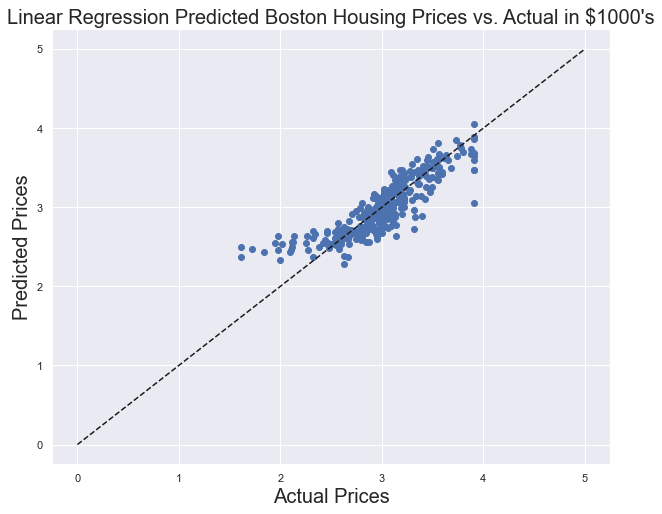

In [270]:
plt.figure(figsize=(10,8))
plt.scatter(y_train, y_predicted_lrm)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [271]:
lrm_train_score= lrm.score(X_train,y_train)
print("Linear Regression R_squared = ",lrm.score(X_train,y_train)) 
pred_lrm_train= lrm.predict(X_train)
lrm_rmse_train = sqrt(mean_squared_error(pred_lrm_train, y_train))
print('Linear Regression RMSE = ', lrm_rmse_train)

Linear Regression R_squared =  0.7481343182135873
Linear Regression RMSE =  0.2025601495618862


In [272]:
rmse/np.mean(y)*100

NameError: name 'rmse' is not defined

In [273]:
print(lrm.coef_)

[-4.6039e-02 -1.2328e-02  6.8970e-06  1.0962e-01 -2.6864e-01  4.7329e-01
  6.4385e-06 -1.3907e-01  9.8491e-02 -2.1000e-01 -5.0377e-01 -4.4208e-01]


In [274]:
print(lrm.intercept_)

5.6870242211425115


In [275]:
# Predict test
y_predicted_lrm = lrm.predict(X_test)

#### Linear Regression Model Actual Vs. Predicted Price Plot

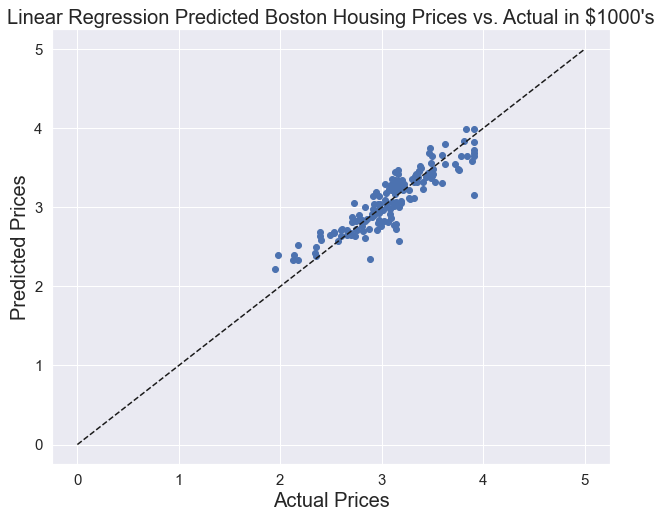

In [276]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_lrm)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [277]:
lrm_test_score= lrm.score(X_test,y_test)
print("Linear Regression R_squared = ",lrm.score(X_test,y_test)) 
pred_lrm_test= lrm.predict(X_test)
lrm_rmse_test = sqrt(mean_squared_error(pred_lrm_test, y_test))
print('Linear Regression RMSE = ', lrm_rmse_test)

Linear Regression R_squared =  0.7981115408585668
Linear Regression RMSE =  0.1856107371549965


In [278]:
lrm_rmse_test/np.mean(y)

0.061165658153684035

In [279]:
print(lrm.coef_.round(2))

[-0.05 -0.01  0.    0.11 -0.27  0.47  0.   -0.14  0.1  -0.21 -0.5  -0.44]


In [280]:
print(lrm.intercept_.round(4))

5.687


# log transformed

In [281]:
lrml = LinearRegression()

# Fit data on to the model
lrml.fit(X_trainl, y_trainl)

# Predict
y_predicted_lrml = lrml.predict(X_trainl)

#### Linear Regression Model Actual Vs. Predicted Price Plot

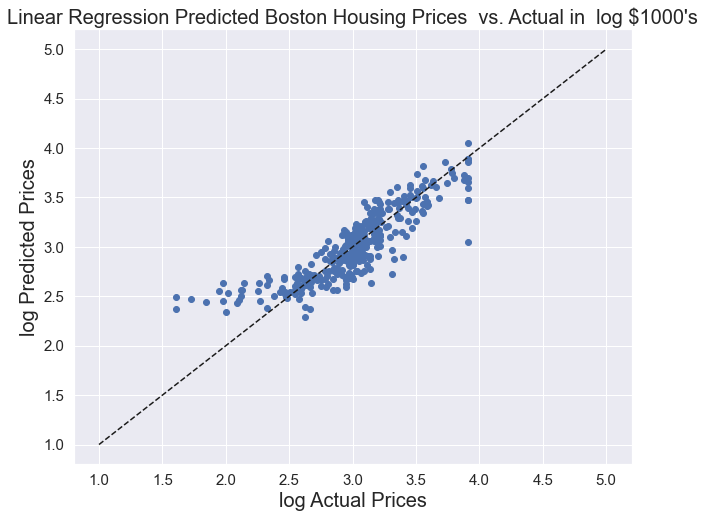

In [282]:
plt.figure(figsize=(10,8))
plt.scatter(y_trainl, y_predicted_lrml)
plt.plot([1, 5], [1, 5], '--k')
plt.axis('tight')
plt.ylabel('log Predicted Prices', fontsize=20);
plt.xlabel('log Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices  vs. Actual in  log $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [283]:
lrml_train_score = lrml.score(X_trainl,y_trainl)
print("Linear Regression R_squared = ",lrml_train_score) 
predl_lrml_train= lrml.predict(X_trainl)
lrml_rmsel_train = sqrt(mean_squared_error(predl_lrml_train, y_trainl))
print('Linear Regression RMSE = ', lrml_rmsel_train)

Linear Regression R_squared =  0.7481343182135873
Linear Regression RMSE =  0.2025601495618862


In [284]:
print(lrml.coef_)

[-4.6039e-02 -1.2328e-02  6.8970e-06  1.0962e-01 -2.6864e-01  4.7329e-01
  6.4385e-06 -1.3907e-01  9.8491e-02 -2.1000e-01 -5.0377e-01 -4.4208e-01]


In [285]:
print(lrml.intercept_)

5.6870242211425115


In [286]:
# Test data

# Predict
y_predicted_lrml = lrml.predict(X_testl)

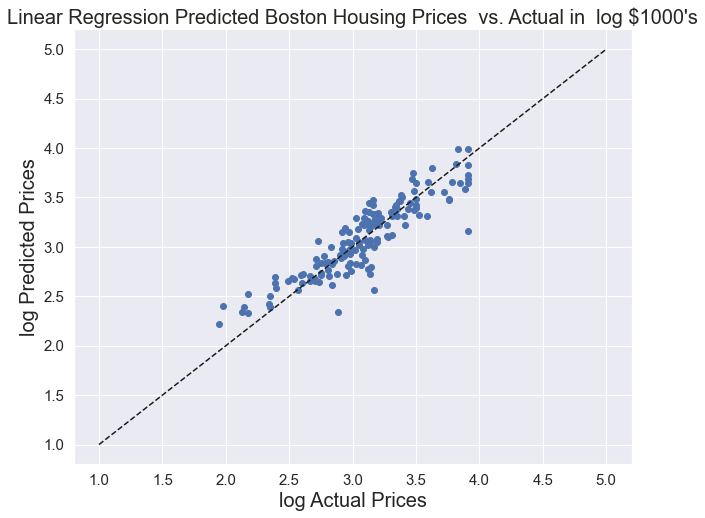

In [287]:
plt.figure(figsize=(10,8))
plt.scatter(y_testl, y_predicted_lrml)
plt.plot([1, 5], [1, 5], '--k')
plt.axis('tight')
plt.ylabel('log Predicted Prices', fontsize=20);
plt.xlabel('log Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices  vs. Actual in  log $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [288]:
lrml_test_score = lrml.score(X_testl,y_testl)
print("Linear Regression R_squared = ",lrml_test_score) 
predl_lrml_test= lrml.predict(X_testl)
lrml_rmsel_test = sqrt(mean_squared_error(predl_lrml_test, y_testl))
print('Linear Regression RMSE = ', lrml_rmsel_test)

Linear Regression R_squared =  0.7981115408585668
Linear Regression RMSE =  0.1856107371549965


In [289]:
print(lrml.coef_)

[-4.6039e-02 -1.2328e-02  6.8970e-06  1.0962e-01 -2.6864e-01  4.7329e-01
  6.4385e-06 -1.3907e-01  9.8491e-02 -2.1000e-01 -5.0377e-01 -4.4208e-01]


In [290]:
print(lrml.intercept_)

5.6870242211425115


In [291]:
np.log

<ufunc 'log'>

## Create Random Forest Regressor

<div class="alert alert-block alert-success">
    <b>Random Forest</b>: is a meta estimator that fits a number of classifying decision trees on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is controlled with the max_samples parameter if bootstrap=True (default), otherwise the whole dataset is used to build each tree
</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.RandomForestRegressor</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html
</div>

#### Create Random Forest Regressor 

In [292]:
Randreg = RandomForestRegressor(random_state=1, warm_start=True, oob_score=True)

# Fit data on to the model
Randreg.fit(X_trainl ,y_trainl)

# Predict
y_predicted_Randreg = Randreg.predict(X_trainl)

#### Random Forest Regressor Model Actual Vs. Predicted Price Plot

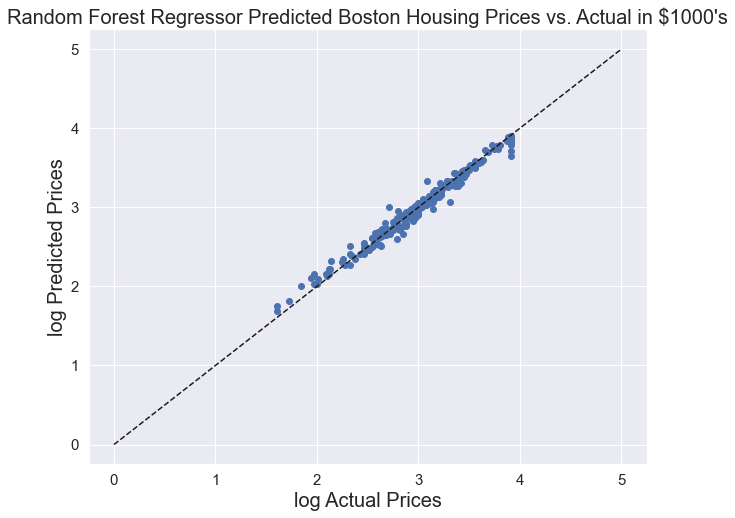

In [293]:
plt.figure(figsize=(10,8))
plt.scatter(y_trainl, y_predicted_Randreg)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.ylabel('log Predicted Prices', fontsize=20);
plt.xlabel('log Actual Prices', fontsize=20);
plt.title("Random Forest Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [294]:
Randreg_train = Randreg.score(X_trainl,y_trainl)
print("Random Forest Regressor R_squared = ",Randreg.score(X_trainl,y_trainl)) 
pred_Randreg_train= Randreg.predict(X_trainl)
Randreg_rmse_train = sqrt(mean_squared_error(pred_Randreg_train, y_trainl))
print('Random Forest Regressor RMSE = ', Randreg_rmse_train)

Random Forest Regressor R_squared =  0.9781426750801315
Random Forest Regressor RMSE =  0.05967164562886086


In [295]:
Randreg_OOB_score= Randreg.oob_score_

Randreg_OOB_score

0.8364766299516411

In [296]:
print("Random Forest Regressor R_squared = ",Randreg.score(X,yl)) 
pred= Randreg.predict(X)
rmse = sqrt(mean_squared_error(pred, yl))
print('Random Forest Regressor RMSE = ', rmse)

Random Forest Regressor R_squared =  0.9415662883597246
Random Forest Regressor RMSE =  0.09859494608906412


In [297]:
print(Randreg.decision_path(X))

(<506x42868 sparse matrix of type '<class 'numpy.int64'>'
	with 542155 stored elements in Compressed Sparse Row format>, array([    0,   437,   850,  1279,  1726,  2143,  2546,  2991,  3436,
        3877,  4290,  4705,  5154,  5595,  6036,  6479,  6914,  7361,
        7790,  8213,  8640,  9043,  9446,  9877, 10312, 10733, 11162,
       11595, 12022, 12451, 12892, 13325, 13768, 14197, 14656, 15071,
       15518, 15945, 16366, 16781, 17200, 17617, 18056, 18499, 18948,
       19371, 19810, 20241, 20662, 21081, 21494, 21903, 22324, 22735,
       23142, 23571, 24008, 24405, 24828, 25251, 25662, 26107, 26536,
       26973, 27428, 27865, 28300, 28717, 29154, 29595, 30036, 30441,
       30888, 31321, 31778, 32205, 32622, 33063, 33490, 33905, 34330,
       34771, 35206, 35633, 36064, 36483, 36924, 37359, 37786, 38207,
       38642, 39071, 39508, 39911, 40344, 40779, 41194, 41631, 42034,
       42463, 42868], dtype=int32))


In [298]:

# Predict FOR TEST
y_predicted_Randreg = Randreg.predict(X_testl)

#### Random Forest Regressor Model Actual Vs. Predicted Price Plot

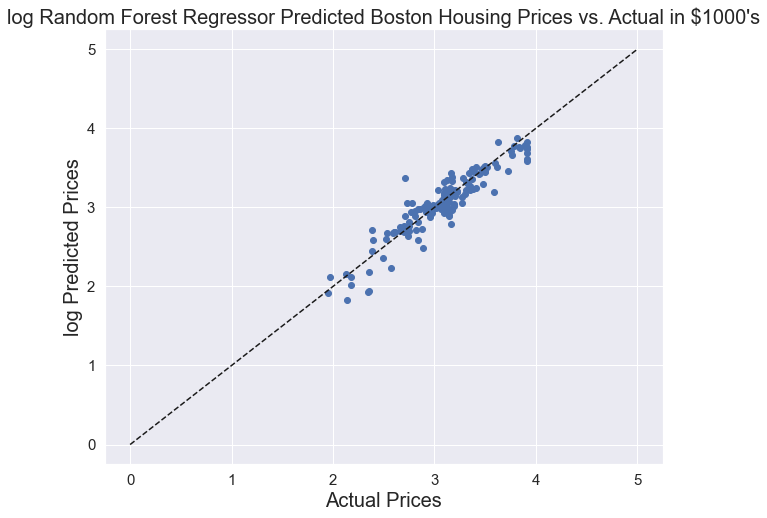

In [299]:
plt.figure(figsize=(10,8))
plt.scatter(y_testl, y_predicted_Randreg)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.ylabel('log Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("log Random Forest Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [300]:
Randreg_test = Randreg.score(X_testl,y_testl)
print("Random Forest Regressor R_squared = ",Randreg.score(X_testl,y_testl)) 
pred_Randreg_test= Randreg.predict(X_testl)
Randreg_rmse_test = sqrt(mean_squared_error(pred_Randreg_test, y_testl))
print('Random Forest Regressor RMSE = ', Randreg_rmse_test)

Random Forest Regressor R_squared =  0.8589597253393877
Random Forest Regressor RMSE =  0.15513826185159157


In [301]:
print(Randreg.decision_path(X))

(<506x42868 sparse matrix of type '<class 'numpy.int64'>'
	with 542155 stored elements in Compressed Sparse Row format>, array([    0,   437,   850,  1279,  1726,  2143,  2546,  2991,  3436,
        3877,  4290,  4705,  5154,  5595,  6036,  6479,  6914,  7361,
        7790,  8213,  8640,  9043,  9446,  9877, 10312, 10733, 11162,
       11595, 12022, 12451, 12892, 13325, 13768, 14197, 14656, 15071,
       15518, 15945, 16366, 16781, 17200, 17617, 18056, 18499, 18948,
       19371, 19810, 20241, 20662, 21081, 21494, 21903, 22324, 22735,
       23142, 23571, 24008, 24405, 24828, 25251, 25662, 26107, 26536,
       26973, 27428, 27865, 28300, 28717, 29154, 29595, 30036, 30441,
       30888, 31321, 31778, 32205, 32622, 33063, 33490, 33905, 34330,
       34771, 35206, 35633, 36064, 36483, 36924, 37359, 37786, 38207,
       38642, 39071, 39508, 39911, 40344, 40779, 41194, 41631, 42034,
       42463, 42868], dtype=int32))


0.08333333333333333

In [319]:
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

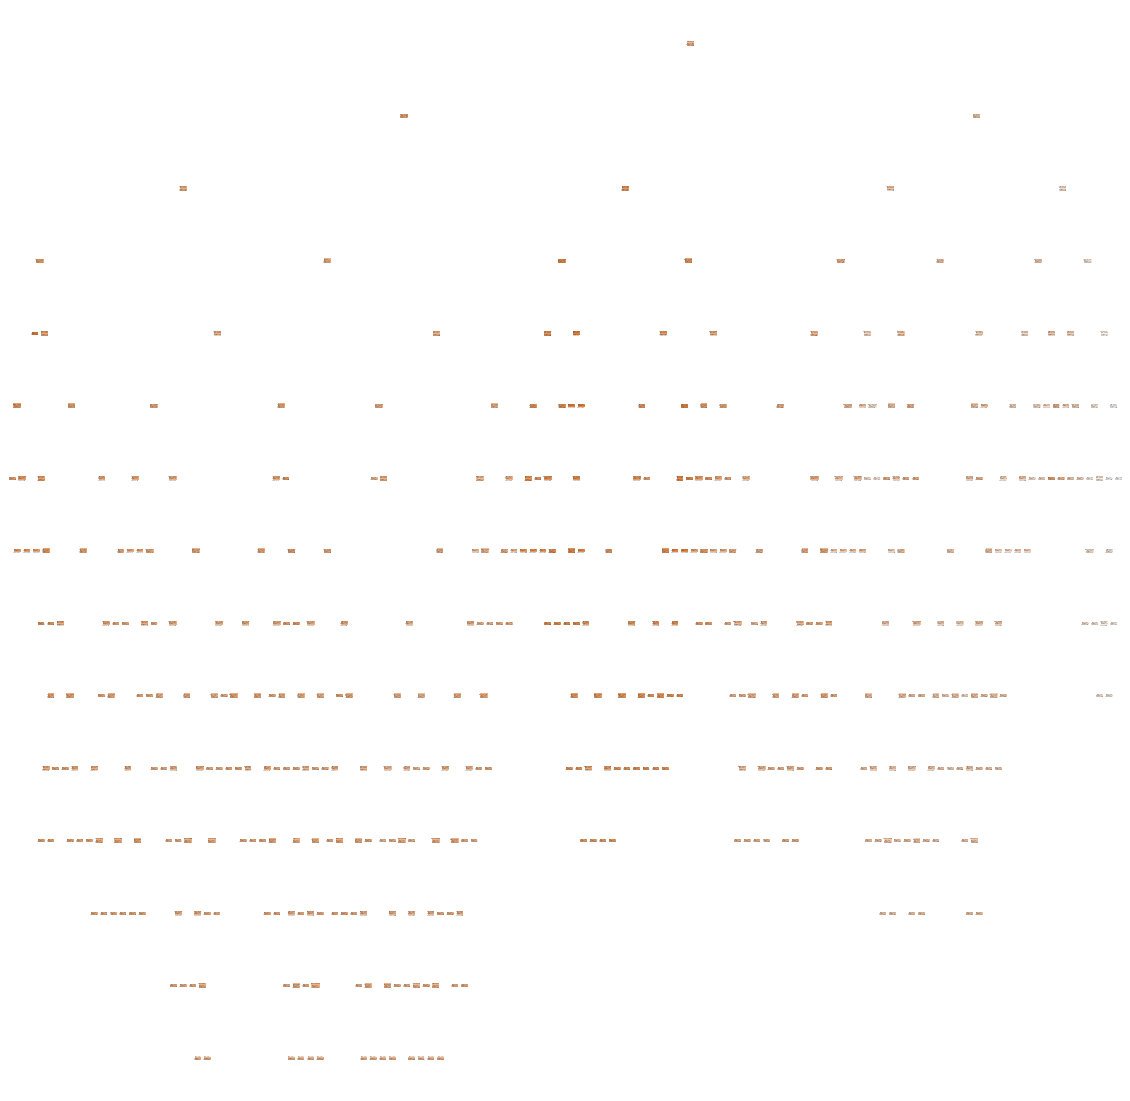

In [320]:
plt.figure(figsize=(20,20))
_= tree.plot_tree(Randreg.estimators_[0], feature_names=X.columns, filled=True)

def save_decision_trees_as_png(Randreg, iteration, feature_name, target_name):
    file_name = "iris_" + str(iteration) + ".png"
    dot_data = export_graphviz(
        Randreg,
        out_file=None,
       feature_names=feature_name,
        class_names=target_name,
        rounded=True,
        proportion=False,
        precision=2,
        filled=True,
    )
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_png(file_name)
    print("Decision Tree {} saved as png file".format(iteration + 1))

In [303]:
Randreg.estimators_[0]

DecisionTreeRegressor(max_features='auto', random_state=1791095845)


save_decision_trees_as_png(Randreg.estimators_[1], 1, feature_name= columns, target_name= boston_Target)

In [304]:
Randreg_oob_score= Randreg.oob_score_

Automatically created module for IPython interactive environment


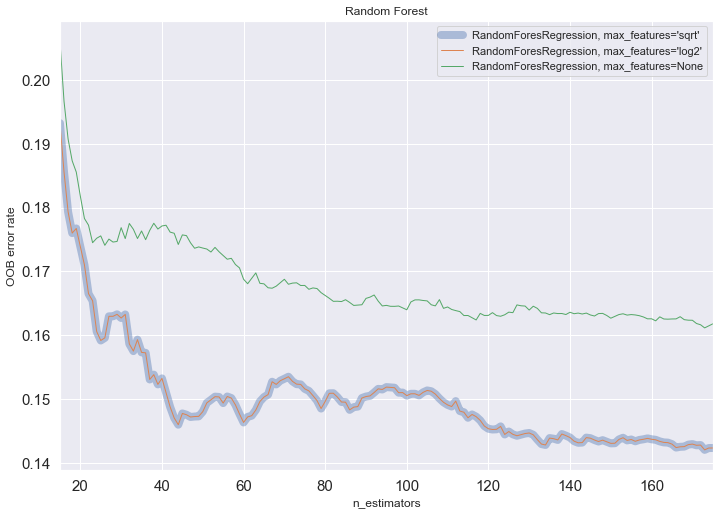

In [305]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123



# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("RandomForesRegression, max_features='sqrt'",
       RandomForestRegressor(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE)),
    ("RandomForesRegression, max_features='log2'",
        RandomForestRegressor(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE)),
    ("RandomForesRegression, max_features=None",
        RandomForestRegressor(warm_start=True, max_features= None,
                               oob_score=True,
                               random_state=RANDOM_STATE))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    al= 1
    ln = 1
    if label == "RandomForesRegression, max_features='sqrt'":
        ln = 8.0
        al = 0.4
       
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label, alpha= al, linewidth = ln)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.title('Random Forest')
plt.show()

In [306]:
for label, clf_err in error_rate.items():
    print (label)

RandomForesRegression, max_features='sqrt'
RandomForesRegression, max_features='log2'
RandomForesRegression, max_features=None


## Create Extra-Trees Regressor

<div class="alert alert-block alert-success">
    <b>Extra-Trees Regressor</b>: This class implements a meta estimator that fits a number of randomized decision trees (a.k.a. extra-trees) on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting</div>

<div class="alert alert-block alert-info">
<b>sklearn.ensemble.ExtraTreesRegressor</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.ExtraTreesRegressor.html
</div>

In [307]:
ETreg = ExtraTreesRegressor(random_state=1, warm_start=True, oob_score=True, bootstrap=True)

# Fit data on to the model
ETreg.fit(X_train, y_train)

# Predict
y_predicted_ETreg = ETreg.predict(X_train)

#### Extra-Trees Regressor Model Actual Vs. Predicted Price Plot

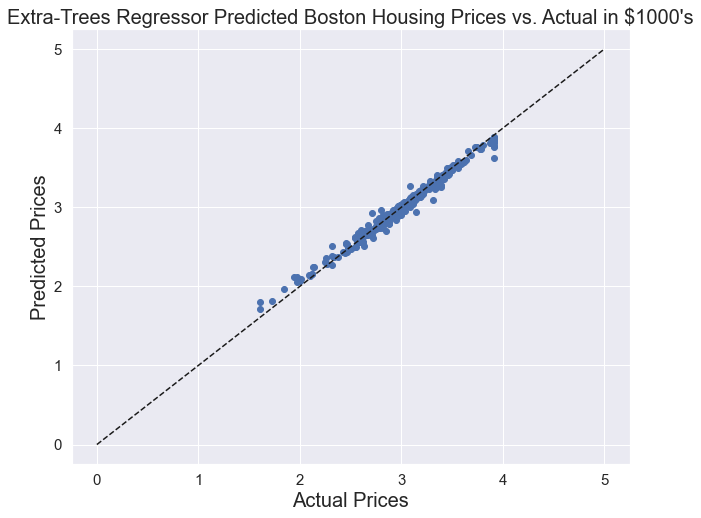

In [308]:
plt.figure(figsize=(10,8))
plt.scatter(y_train,y_predicted_ETreg)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Extra-Trees Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [309]:
ETreg_train_score= ETreg.score(X_train,y_train)
print("Extra-Trees Regressor R_squared = ",ETreg_train_score) 
pred_ETreg_train= ETreg.predict(X_train)
ETreg_rmse_train = sqrt(mean_squared_error(pred_ETreg_train, y_train))
print('Extra-Trees Regressor RMSE = ', ETreg_rmse_train)

Extra-Trees Regressor R_squared =  0.9812921240372825
Extra-Trees Regressor RMSE =  0.055205424248920415


In [310]:
ETreg_OOB_score = ETreg.oob_score_
ETreg_OOB_score

0.8587194971166094

In [311]:
ETreg.feature_importances_

array([0.0826, 0.0071, 0.0391, 0.005 , 0.0721, 0.167 , 0.0401, 0.0457,
       0.0215, 0.0645, 0.0528, 0.4025])

In [ ]:
# test

In [ ]:

# Predict
y_predicted_ETreg = ETreg.predict(X_test)

#### Extra-Trees Regressor Model Actual Vs. Predicted Price Plot

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_ETreg)
plt.plot([0, 5], [0, 5], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Extra-Trees Regressor Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [ ]:
ETreg_test_score= ETreg.score(X_test,y_test)
print("Extra-Trees Regressor R_squared = ",ETreg_test_score) 
pred_ETreg_test= ETreg.predict(X_test)
ETreg_rmse_test = sqrt(mean_squared_error(pred_ETreg_test, y_test))
print('Extra-Trees Regressor RMSE = ', ETreg_rmse_test)

In [312]:
lc = list(X_train.columns)

In [316]:
rc = list(Randreg.feature_importances_.round(3))

In [314]:
ec = list(ETreg.feature_importances_.round(3))

In [ ]:
ETreg_obb_score = ETreg.oob_score_

In [317]:
rest = [i +" - " +str(j) for i, j in zip(lc, rc)]
rest

['crim - 0.101',
 'zn - 0.0',
 'indus - 0.007',
 'chas - 0.002',
 'nox - 0.031',
 'rooms - 0.197',
 'age - 0.02',
 'dis - 0.05',
 'rad - 0.003',
 'tax - 0.019',
 'ptratio - 0.007',
 'lstat - 0.563']

In [ ]:
# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.

from collections import OrderedDict
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier

# Author: Kian Ho <hui.kian.ho@gmail.com>
#         Gilles Louppe <g.louppe@gmail.com>
#         Andreas Mueller <amueller@ais.uni-bonn.de>
#
# License: BSD 3 Clause

print(__doc__)

RANDOM_STATE = 123



# NOTE: Setting the `warm_start` construction parameter to `True` disables
# support for parallelized ensembles but is necessary for tracking the OOB
# error trajectory during training.
ensemble_clfs = [
    ("ExtraTreeRegression, max_features='sqrt'",
       ExtraTreesRegressor(warm_start=True, oob_score=True,
                               max_features="sqrt",
                               random_state=RANDOM_STATE,bootstrap=True)),
    ("ExtraTreeRegression, max_features='log2'",
        ExtraTreesRegressor(warm_start=True, max_features='log2',
                               oob_score=True,
                               random_state=RANDOM_STATE,bootstrap=True)),
    ("ExtraTreeRegression, max_features=None",
        ExtraTreesRegressor(warm_start=True, max_features= None,
                               oob_score=True,
                               random_state=RANDOM_STATE,bootstrap=True))
]

# Map a classifier name to a list of (<n_estimators>, <error rate>) pairs.
error_rate = OrderedDict((label, []) for label, _ in ensemble_clfs)

# Range of `n_estimators` values to explore.
min_estimators = 15
max_estimators = 175

for label, clf in ensemble_clfs:
    for i in range(min_estimators, max_estimators + 1):
        clf.set_params(n_estimators=i)
        clf.fit(X_train, y_train)

        # Record the OOB error for each `n_estimators=i` setting.
        oob_error = 1 - clf.oob_score_
        error_rate[label].append((i, oob_error))

# Generate the "OOB error rate" vs. "n_estimators" plot.
for label, clf_err in error_rate.items():
    al= 1
    ln = 1
    if label == "ExtraTreeRegression, max_features='sqrt'":
        ln = 8.0
        al = 0.4
       
    xs, ys = zip(*clf_err)
    plt.plot(xs, ys, label=label, alpha= al, linewidth = ln)

plt.xlim(min_estimators, max_estimators)
plt.xlabel("n_estimators")
plt.ylabel("OOB error rate")
plt.legend(loc="upper right")
plt.title('Extra Tree')
plt.show()

In [ ]:
obbscore= [{'Random_forest oob score': Randreg_oob_score,
          'Extra Trees oob score': ETreg_obb_score}]

In [ ]:
dfob = pd.DataFrame(obbscore)
dfob

In [1398]:
# Create dataframe of RMSE results
rmse_df = pd.DataFrame({
    'Linear R2': [lrm_train_score, lrm_test_score],
    'Linear RMSE': [lrm_rmse_train, lrm_rmse_test],
    'Random Fores R2': [Randreg_train, Randreg_test],
    'Random Forest RMSE': [Randreg_rmse_train, Randreg_rmse_test],
    'Extra Tree R2': [ETreg_train_score, ETreg_test_score],
    'Extra Tree RMSE': [ETreg_rmse_train, ETreg_rmse_test],
}, index=['Train', 'Test'])

In [1399]:
rmse_df

,Linear R2,Linear RMSE,Random Fores R2,Random Forest RMSE,Extra Tree R2,Extra Tree RMSE
Train,0.748134,0.202560,0.978143,0.059672,0.981292,0.055205
Test,0.798112,0.185611,0.858960,0.155138,0.894938,0.133897


#### Create copy for Model Development 

In [1390]:
boston_df6['mv']= np.log(boston_df6['mv'])

In [1391]:
model_data = boston_df6.values

#### Models (Linear Regression, Random Forest Regressor, Extra Trees Regressor)

In [1392]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear Regression', 'Random Forest Regressor', 'Extra Trees Regressor']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              RandomForestRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED),
              ExtraTreesRegressor(n_estimators = 100, criterion='mse', max_features = 10, bootstrap=True, n_jobs = -1, random_state = RANDOM_SEED)
            ]

### Random Search

In [1393]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [1067]:
cv_results_df.head(10)

,Linear Regression,Random Forest Regressor,Extra Trees Regressor
0,3.358701,3.143225,3.155758
1,3.626388,2.221260,2.335744
2,2.846237,2.080909,1.747800
3,5.003792,4.809336,4.852215
4,4.722870,3.341047,3.244741
5,5.077457,4.482488,3.809920
6,3.154763,2.822839,3.048352
7,10.558164,9.168797,8.793704
8,4.609429,4.825865,4.018565
9,4.650974,3.526106,3.181514


### Tuning Parameters with GridSearchCV

<div class="alert alert-block alert-info">
<b>sklearn.model_selection.GridSearchCV</b><br>
https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
</div>

#### HyperParameter Search Random Forrest

In [1068]:
param_grid = { 
            "n_estimators"      : [100,125,150],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [1069]:
estimator = RandomForestRegressor()

In [1070]:
grid = GridSearchCV(estimator, param_grid, cv=10)

In [1071]:
grid.fit(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
grid.best_params_

In [ ]:
param_grid = { 
            "n_estimators"      : [100,125,150],
            "max_features"      : ["auto", "sqrt", "log2"],
            "min_samples_split" : [2,4,8],
            "bootstrap": [True, False],
            }

In [ ]:
estimator = ExtraTreesRegressor()

In [ ]:
gridET = GridSearchCV(estimator, param_grid, cv=10)

In [ ]:
gridET.fit(X_train, y_train)

In [ ]:
gridET.best_params_



sample_id = 0

for j, tree in enumerate(Randreg.estimators_):

    n_nodes = tree.tree_.node_count
    children_left = tree.tree_.children_left
    children_right = tree.tree_.children_right
    feature = tree.tree_.feature
    threshold = tree.tree_.threshold

    print("Decision path for DecisionTree {0}".format(j))
    node_indicator = tree.decision_path(X_train)
    leave_id = tree.apply(X_train)
    node_index = node_indicator.indices[node_indicator.indptr[sample_id]:
                                        node_indicator.indptr[sample_id + 1]]



    print('Rules used to predict sample %s: ' % sample_id)
    for node_id in node_index:
        if leave_id[sample_id] != node_id:
            continue

        if (X_train[sample_id, feature[node_id]] <= threshold[node_id]):
            threshold_sign = "<="
        else:
            threshold_sign = ">"

        print("decision id node %s : (X_train[%s, %s] (= %s) %s %s)"
              % (node_id,
                 sample_id,
                 feature[node_id],
                 X_train[sample_id, feature[node_id]],
                 threshold_sign,
                 threshold[node_id]))

In [1394]:
model_params = {
    'random_forest': {
        'model': RandomForestRegressor(),
        'params' : {"n_estimators": [50,75,100,125],
            "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth": [5,10,15,20],
            "min_samples_split" : [2,4,8,10],
            "bootstrap": [True, False]
        }
    },
    'ExtraTree': {
        'model': ExtraTreesRegressor(),
        'params' : {"n_estimators" : [50,75,100,125],
             "max_features"      : ["auto", "sqrt", "log2"],
            "max_depth": [5,10,15,20],
            "min_samples_split" : [2,4,8,10],
            
            "bootstrap": [True, False]
            
        }
    }     
}

In [1395]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=True)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,random_forest,0.554066,"{'bootstrap': False, 'max_depth': 15, 'max_fea..."
1,ExtraTree,0.578904,"{'bootstrap': True, 'max_depth': 15, 'max_feat..."


In [ ]:
list(df['best_params'])

In [ ]:
Randreg.p

when we have noisey features extra tree classifer perfrombs better 